## **Dataset and Model Files**

In [0]:
import os
os.mkdir('Seq2Seq')

In [0]:
from google.colab import files
files.upload() #upload kaggle.json

Mount google drive

In [0]:
from google.colab import drive
drive.mount('/content/drive')

### Download and process TIMIT dataset

In [0]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets download mfekadu/darpa-timit-acousticphonetic-continuous-speech
!unzip -q darpa-timit-acousticphonetic-continuous-speech.zip -d Timit_dataset

In [0]:
import shutil
import os
os.mkdir('Seq2Seq/TIMIT')
shutil.move('Timit_dataset/data/TRAIN','Seq2Seq/TIMIT')
shutil.move('Timit_dataset/data/TEST','Seq2Seq/TIMIT')
shutil.rmtree('Timit_dataset', ignore_errors=True)
os.remove('darpa-timit-acousticphonetic-continuous-speech.zip')

Move to Seq2Seq directory

In [0]:
import os
os.chdir('Seq2Seq')

Upload model files

In [0]:
from google.colab import files
files.upload()

Prepare TIMIT dataset

In [0]:
!python3 prepare_timit.py

## **Model Training**

In [0]:
import constants as c
from dataset import create_dataset
from visualization import plot_accuracy, plot_loss
from model import create_model, create_optimizer, create_loss_function

In [0]:
X, y, y_lag = create_dataset()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      [(None, 779, 26)]    0                                            
__________________________________________________________________________________________________
bidirectional_encoder (Bidirect multiple             76800       encoder_input[0][0]              
__________________________________________________________________________________________________
decoder_input (InputLayer)      [(None, 82, 30)]     0                                            
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 200)          0           bidirectional_encoder[0][1]      
                                                                 bidirectional_encoder[0][2]  

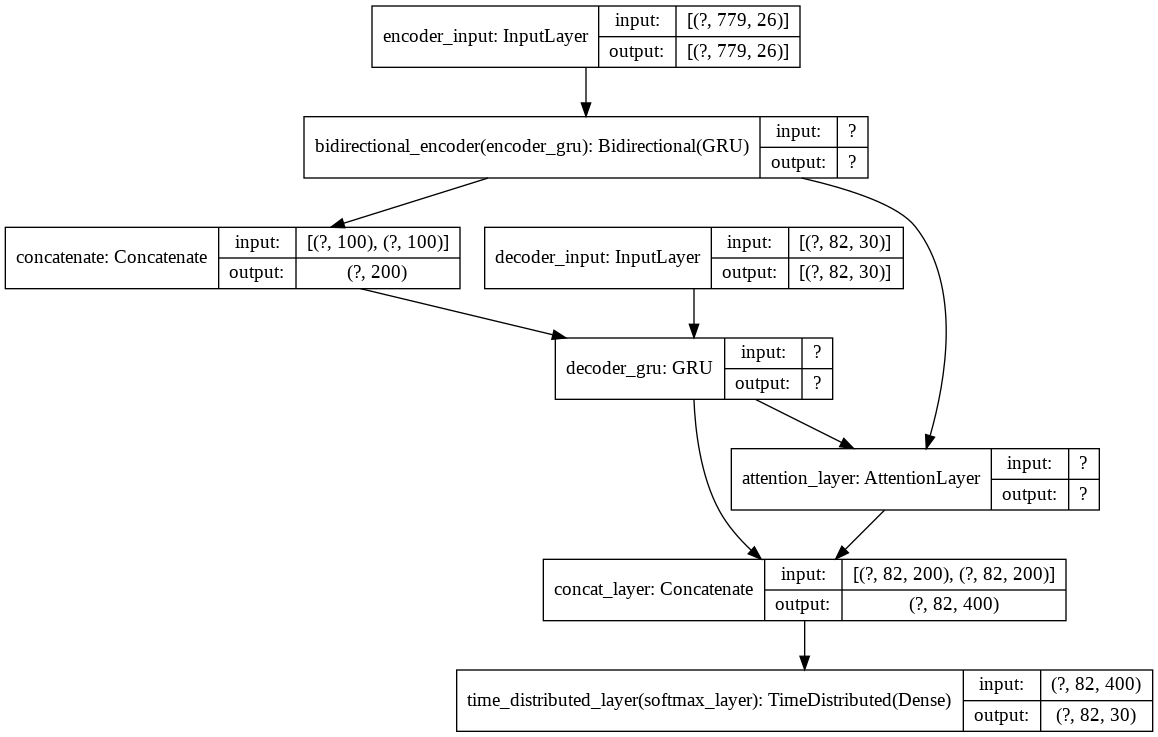

In [0]:
full_model, encoder_model, decoder_model = create_model(X.shape[1], y.shape[1])

full_model.summary()

optimizer = create_optimizer()

loss = create_loss_function()

full_model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

from tensorflow.keras.utils import plot_model
plot_model(encoder_model, to_file='encoder_model.png', show_shapes=True)
plot_model(decoder_model, to_file='decoder_model.png', show_shapes=True)
plot_model(full_model, to_file='full_model.png', show_shapes=True)

In [0]:
history = full_model.fit(
    [X, y],
    y_lag,
    batch_size=c.batch_size,
    epochs=100,
    validation_split=0.2,
    shuffle=True,
    initial_epoch=0
    )

Epoch 1/100
81/81 [==============================] - 56s 697ms/step - loss: 1.9293 - accuracy: 0.4766 - val_loss: 1.6625 - val_accuracy: 0.5212
Epoch 2/100
81/81 [==============================] - 56s 695ms/step - loss: 1.5504 - accuracy: 0.5517 - val_loss: 1.4434 - val_accuracy: 0.5730
Epoch 3/100
81/81 [==============================] - 57s 700ms/step - loss: 1.4074 - accuracy: 0.5802 - val_loss: 1.3736 - val_accuracy: 0.5899
Epoch 4/100
81/81 [==============================] - 57s 705ms/step - loss: 1.3544 - accuracy: 0.5919 - val_loss: 1.3405 - val_accuracy: 0.5968
Epoch 5/100
81/81 [==============================] - 58s 711ms/step - loss: 1.3156 - accuracy: 0.6015 - val_loss: 1.2991 - val_accuracy: 0.6069
Epoch 6/100
81/81 [==============================] - 57s 709ms/step - loss: 1.2783 - accuracy: 0.6104 - val_loss: 1.2684 - val_accuracy: 0.6139
Epoch 7/100
81/81 [==============================] - 58s 711ms/step - loss: 1.2482 - accuracy: 0.6186 - val_loss: 1.2448 - val_accuracy:

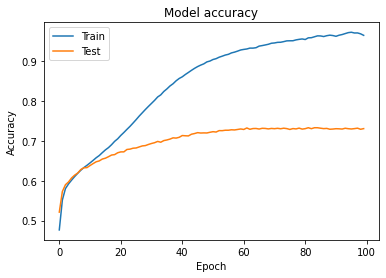

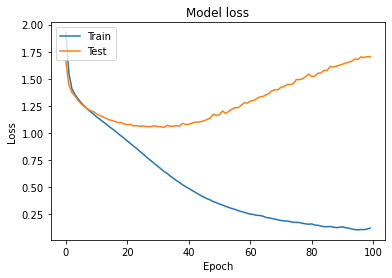

In [0]:
plot_accuracy(history)
plot_loss(history)

In [0]:
full_model.save_weights("full_model.h5")
encoder_model.save_weights("encoder_model.h5")
decoder_model.save_weights("decoder_model.h5")

## **Model Predction**

In [0]:
full_model.load_weights("/content/drive/My Drive/Colab Notebooks/full_model.h5")
encoder_model.load_weights("/content/drive/My Drive/Colab Notebooks/encoder_model.h5")
decoder_model.load_weights("/content/drive/My Drive/Colab Notebooks/decoder_model.h5")